In [1]:
import warnings
warnings.filterwarnings('ignore')
import pysal as ps
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
digital_mesh = gpd.read_file('data\malhas_digitais\municipios.json')
correspondencia = pd.read_csv('data\correspondencia-tse-ibge.csv')
correspondencia['CD_GEOCMU'] = correspondencia['CD_GEOCMU'].astype(str) 

digital_mesh = digital_mesh.merge(correspondencia, on='CD_GEOCMU', how='left')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import figure, scatter, show

### Vizualizando centroids de cada município

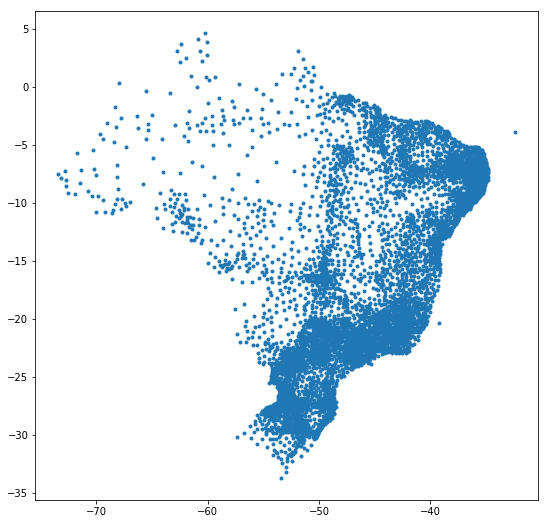

In [4]:
digital_mesh['id'] = digital_mesh['CD_GEOCMU'] 
digital_mesh.set_index('id', inplace=True)

centroids = digital_mesh['geometry'].centroid
digital_mesh['c_x'] = [centroid.xy[0][0] for centroid in centroids]
digital_mesh['c_y'] = [centroid.xy[1][0] for centroid in centroids]

fig = figure(figsize=(9,9))
plt.plot(digital_mesh['c_x'], digital_mesh['c_y'], '.')
show()

### Calculando e Vizualizando pesos (ROOK) para Morans Index

C:\Users\Tiago\Anaconda3\lib\site-packages\pysal\lib\weights\weights.py:170: UserWarning: The weights matrix is not fully connected. There are 2 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


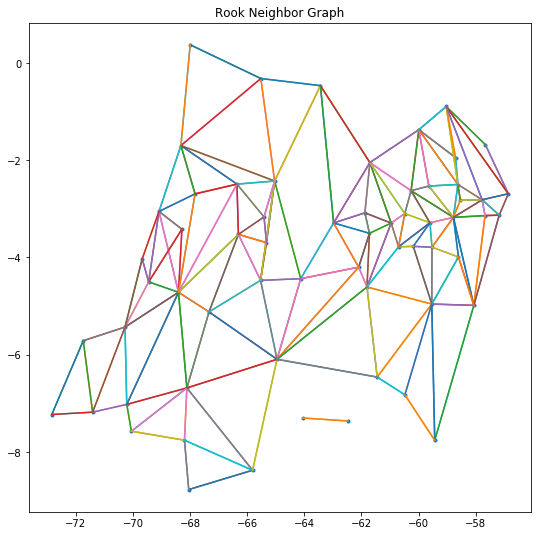

In [5]:
digital_mesh = digital_mesh.query('UF == "AM"')
W = ps.lib.weights.Rook(polygons=digital_mesh['geometry'].tolist(),ids=digital_mesh['CD_GEOCMU'].tolist())

fig = figure(figsize=(9,9))

plt.plot(digital_mesh['c_x'], digital_mesh['c_y'],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
for k,neighs in W.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = digital_mesh.loc[[k,neigh]]
        plt.plot(segment.c_x, segment.c_y, '-')
plt.title('Rook Neighbor Graph')
show()

### Calculando e Vizualizando pesos (QUEEN) para Morans Index

C:\Users\Tiago\Anaconda3\lib\site-packages\pysal\lib\weights\weights.py:170: UserWarning: The weights matrix is not fully connected. There are 2 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


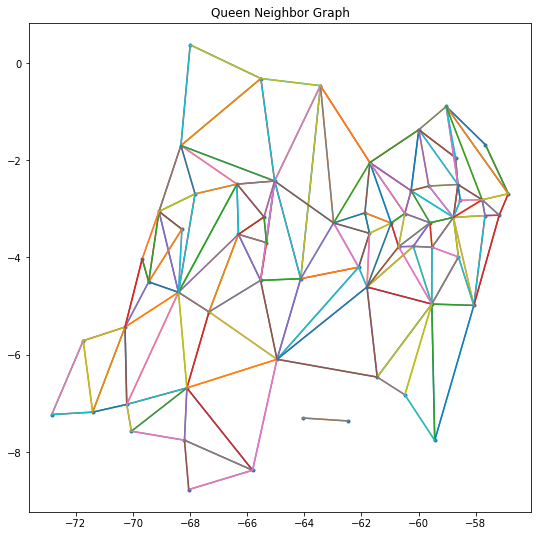

In [6]:
W = ps.lib.weights.Queen(polygons=digital_mesh['geometry'].tolist(),ids=digital_mesh['CD_GEOCMU'].tolist())

fig = figure(figsize=(9,9))

plt.plot(digital_mesh['c_x'], digital_mesh['c_y'],'.')
#plt.plot(s04[:,0], s04[:,1], '-')
for k,neighs in W.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = digital_mesh.loc[[k,neigh]]
        plt.plot(segment.c_x, segment.c_y, '-')
plt.title('Queen Neighbor Graph')
show()

### Filtrando votos para apenas um estado

In [7]:

votos = pd.read_csv('data\municipios_turno_2.csv')
votos_uf = votos.query('UF == "AM"')
votos_uf['CD_GEOCMU'] = votos_uf['CD_GEOCMU'].astype(str) 
votos_uf

,CD_GEOCMU,COD_TSE,UF,NM_MUNICIPIO,13,17,13%,17%
138,1300029,2895,AM,ALVARÃES,5295,1380,79.325843,20.674157
160,1300060,2917,AM,AMATURÁ,3400,846,80.075365,19.924635
181,1300086,2933,AM,ANAMÃ,4077,1771,69.716142,30.283858
214,1300102,2038,AM,ANORI,3681,2253,62.032356,37.967644
251,1300144,2003,AM,APUÍ,3046,3218,48.627075,51.372925
383,1300201,2054,AM,ATALAIA DO NORTE,4020,851,82.529255,17.470745
399,1300300,2070,AM,AUTAZES,12407,4509,73.344762,26.655238
457,1300409,2097,AM,BARCELOS,3608,1913,65.350480,34.649520
497,1300508,2119,AM,BARREIRINHA,11611,1036,91.808334,8.191666
566,1300607,2135,AM,BENJAMIN CONSTANT,12275,2026,85.833159,14.166841


### Vizualizando votos por candidatos

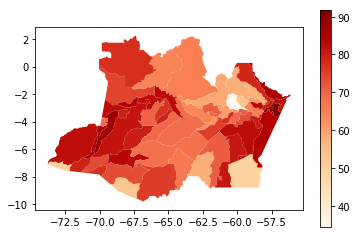

In [10]:

digital_mesh = digital_mesh.merge(votos_uf,on='CD_GEOCMU', how='left')
digital_mesh.plot(column='13%', cmap='OrRd', legend=True)

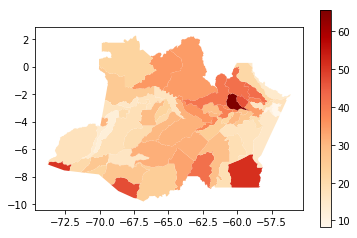

In [11]:
digital_mesh.plot(column='17%', cmap='OrRd', legend=True)

### Calcular e plotar Morans index

In [12]:
#Encontrar a Similaridade entre os dados

moran = ps.explore.esda.Moran(digital_mesh['17%'].values,W) 
moran.I, moran.p_sim

(0.31754526899677066, 0.001)

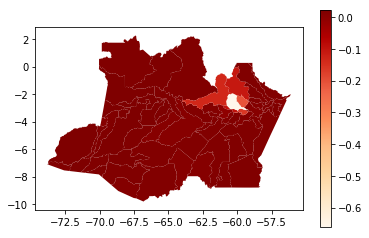

In [13]:
digital_mesh['moran_local'] = ps.explore.esda.Moran_Local(digital_mesh['17'].values, W).Is
digital_mesh.head()
digital_mesh.plot(column='moran_local', cmap='OrRd', legend=True)